## Problem 3

In [6]:
%matplotlib inline

# plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

# testing tools
from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal

In [5]:
!cat ~/2001.csv | wc -l

 5967781


In [8]:
!mkdir -p ~/w7p3/ 
! awk 'NR == 1 || NR % 1000 == 0' ~/2001.csv >~/w7p3/2001.csv 
!head ~/w7p3/2001.csv

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2001,1,11,4,2205,2215,2255,2315,US,416,N514A�,50,60,33,-20,-10,PIT,IAD,183,6,11,0,NA,0,NA,NA,NA,NA,NA
2001,1,3,3,753,745,841,838,US,446,N891��,48,53,37,3,8,PIT,BUF,186,3,8,0,NA,0,NA,NA,NA,NA,NA
2001,1,25,4,716,720,828,839,US,479,N122��,72,79,57,-11,-4,RDU,PHL,336,4,11,0,NA,0,NA,NA,NA,NA,NA
2001,1,8,1,1342,1340,1518,1519,US,507,N606A�,96,99,82,-1,2,CLT,TPA,508,4,10,0,NA,0,NA,NA,NA,NA,NA
2001,1,20,6,NA,1330,NA,1433,US,534,�NKNO�,NA,123,NA,NA,NA,CLT,STL,575,0,0,1,NA,0,NA,NA,NA,NA,NA
2001,1,6,6,951,945,1134,1128,US,566,N340��,103,103,74,6,6,CLT,IND,428,7,22,0,NA,0,NA,NA,NA,NA,NA
2001,1,28,7,1515,1520,1627,1640,US,603,N765��,72,80,57,-13,-5,RDU,PIT,328,7,8,0,NA,0,NA,NA,NA,NA,NA
2001,1,7,7,1110,11

In [12]:
!cat ~/w7p3/2001.csv | wc -l

    5968


In [3]:
def get_columns(filepath, n1, n2, header=True):
    '''
    Returns two integer lists from reading the specified two columns in the CSV file.

    Parameters
    __________
    filepath (str): Input file path. The file is assumed to be in a 
                    Comma Separated Values (CSV) format with latin-1 encoding.
    n1 (int): Column number. The first column starts at 0. The column must be
             a list of integers.
    n2 (int): Another column number.
    '''
    
    col1=[]
    col2=[]
    with open(filepath, 'r',encoding='latin-1') as f:
        if header==True:
            for line in f.readlines()[1:]:
                line = line.strip()
                i=line.split(",")[n1]
                j=line.split(",")[n2]
                if 'NA' not in i and 'NA' not in j:
                    col1.append(int(i))
                    col2.append(int(j))
            return col1,col2
        else:
            for line in f.readlines():
                line = line.strip()
                i=line.split(",")[n1]
                j=line.split(",")[n2]
                if 'NA' not in i and 'NA' not in j:
                    col1.append(int(i))
                    col2.append(int(j))
            return col1,col2

In [12]:
csv_with_header = '''
Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2001,1,17,3,1806,1810,1931,1934,US,375,N700äæ,85,84,60,-3,-4,BWI,CLT,361,5,20,0,NA,0,NA,NA,NA,NA,1
2001,1,18,4,1805,1810,1938,1934,US,375,N713äæ,93,84,64,4,-5,BWI,CLT,361,9,20,0,NA,0,NA,NA,NA,NA,1
2001,1,19,5,1821,1810,1957,1934,US,375,N702äæ,96,84,80,23,11,BWI,CLT,361,6,10,0,NA,0,NA,NA,NA,NA,NA
2001,1,20,6,1807,1810,1944,1934,US,375,N701äæ,97,84,66,10,-3,BWI,CLT,361,4,27,0,NA,0,NA,NA,NA,NA,NA
'''.strip().encode('latin-1')

csv_no_header = '''
2001,1,17,3,1806,1810,1931,1934,US,375,N700äæ,85,84,60,-3,-4,BWI,CLT,361,5,20,0,NA,0,NA,NA,NA,NA,1
2001,1,18,4,1805,1810,1938,1934,US,375,N713äæ,93,84,64,4,-5,BWI,CLT,361,9,20,0,NA,0,NA,NA,NA,NA,1
2001,1,19,5,1821,1810,1957,1934,US,375,N702äæ,96,84,80,23,11,BWI,CLT,361,6,10,0,NA,0,NA,NA,NA,NA,NA
2001,1,20,6,1807,1810,1944,1934,US,375,N701äæ,97,84,66,10,-3,BWI,CLT,361,4,27,0,NA,0,NA,NA,NA,NA,NA
2001,1,21,7,1810,1810,1954,1934,US,375,N768äæ,104,84,62,20,0,BWI,CLT,361,4,38,0,NA,0,NA,NA,NA,NA,1
'''.strip().encode('latin-1')

with open('w7p3/test.header.csv', 'wb') as f:
    f.write(csv_with_header)
    
with open('w7p3/test.noheader.csv', 'wb') as f:
    f.write(csv_no_header)

In [11]:
# assertions for header=True
assert_equal(get_columns('w7p3/test.header.csv', 1, 2, header=True), ([1]*4, list(range(17, 21))))
assert_equal(get_columns('w7p3/test.header.csv', 4, 28, header=True), ([1806, 1805], [1]*2))
assert_equal(get_columns('w7p3/test.header.csv', 3, 27, header=True), ([], []))
assert_equal(get_columns('w7p3/test.header.csv', 0, 12, header=True), ([2001]*4, [84]*4))

# assertions for header=False
assert_equal(get_columns('w7p3/test.noheader.csv', 1, 2, header=False), ([1]*5, list(range(17, 22))))
assert_equal(get_columns('w7p3/test.noheader.csv', 4, 28, header=False), ([1806, 1805, 1810], [1]*3))
assert_equal(get_columns('w7p3/test.noheader.csv', 3, 27, header=False), ([], []))
assert_equal(get_columns('w7p3/test.noheader.csv', 0, 12, header=False), ([2001]*5, [84]*5))

In [15]:
time,distance=get_columns('w7p3/2001.csv', 11, 18, header=True)

In [18]:
# assertions
assert_equal(len(distance), 5720)
assert_equal(len(time), 5720)
assert_equal(distance[:20], [183, 186, 336, 508, 428, 328, 590, 325, 331, 813, 546, 678, 298, 280, 678, 966, 130, 675, 279, 599])
assert_equal(distance[5700:], [643, 667, 781, 316, 1628, 1035, 406, 1199, 1547, 110, 874, 270, 1587, 272, 932, 745, 2116, 190, 761, 547])
assert_equal(time[:20], [50, 48, 72, 96, 103, 72, 106, 78, 66, 175, 93, 141, 81, 86, 128, 204, 48, 126, 66, 100])
assert_equal(time[5700:], [104, 143, 132, 70, 230, 153, 99, 165, 212, 57, 127, 64, 244, 71, 138, 146, 261, 63, 174, 105])

In [38]:
def make_scatter_plot(x, y):
    """
    Creates a two-dimensional scatter plot.
    
    Parameters
    ----------
    x: A list of integers. Data points for the x-axis.
    y: A list of integers. Data poitns for the y-axis.
    
    Returns
    -------
    A matplotlib.Axes object.
    """
    
    fig, ax = plt.subplots()
    np.asarray(x)
    np.asarray(y)
    ax.scatter(x, y)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_title('Scatter Plot')
    return ax

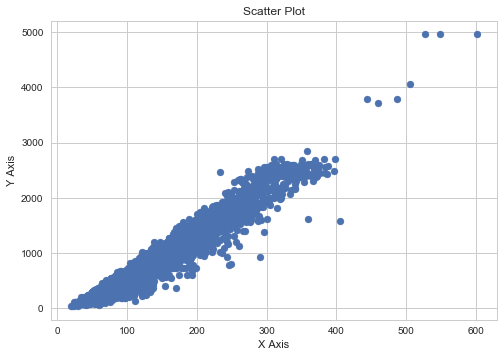

In [39]:
ax = make_scatter_plot(time, distance)

In [40]:
# assertions
assert_is_instance(
    ax, mpl.axes.Axes,
    msg="Your function should return a matplotlib.axes.Axes object."
)

assert_equal(
    len(ax.collections), 1,
    msg="Your plot does not have any data points."
)

assert_is_not(
    len(ax.title.get_text()), 0,
    msg="Your plot doesn't have a title."
)
assert_is_not(
    ax.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive."
)
assert_is_not(
    ax.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive."
)
    
xdata, ydata = ax.collections[0].get_offsets().T
assert_array_equal(xdata, time)
assert_array_equal(ydata, distance)

# If your function can only plot the delays and
# cannot handle other data sets, the following test will fail.
x1 = np.random.randint(100, size=100)
y1 = np.random.randint(100, size=100)

ax1 = make_scatter_plot(x1, y1)

x1data, y1data = ax1.collections[0].get_offsets().T
assert_array_equal(x1, x1data)
assert_array_equal(y1, y1data)

plt.close()